In [57]:
import pandas as pd
import numpy as np

In [48]:
data = pd.read_csv('sleep and psychological effects.csv')
data.head()

,User_ID,Age,Gender,Favorite_Book_Genre,Weekly_Reading_Time(hours),Mood_Impact
0,1,24,f,Fiction,6,Positive
1,2,32,m,Science,2,Neutral
2,3,18,f,Romance,8,Positive
3,4,45,m,History,3,Neutral
4,5,29,f,Fantasy,10,Positive


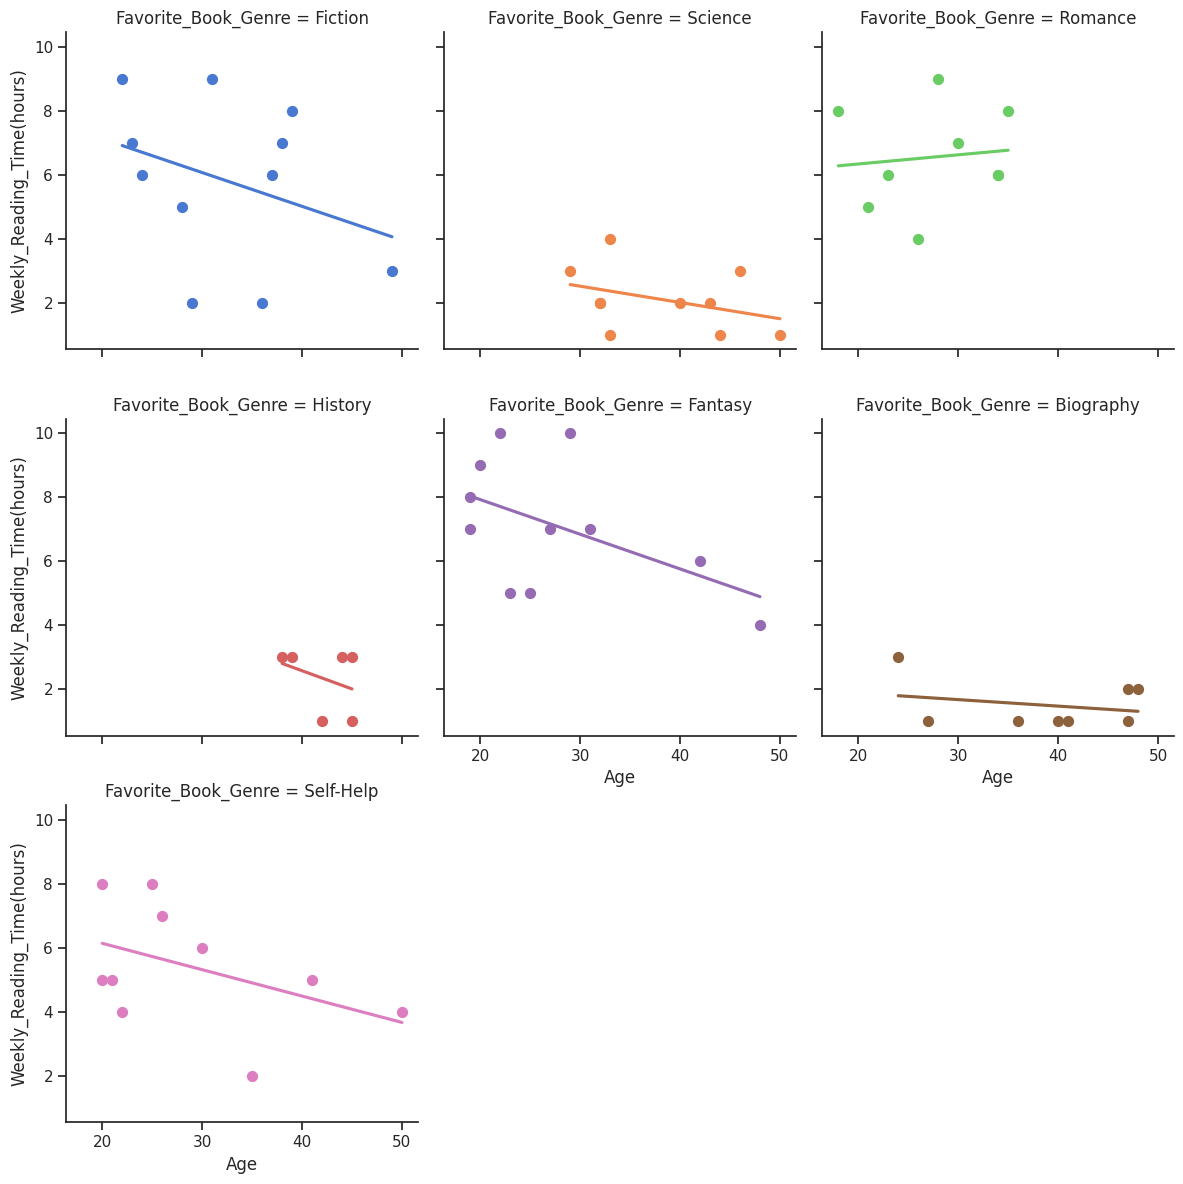

In [38]:
import seaborn as sns

sns.lmplot(
    data=data, x="Age", y="Weekly_Reading_Time(hours)", col="Favorite_Book_Genre", hue="Favorite_Book_Genre",
    col_wrap=3, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}

)

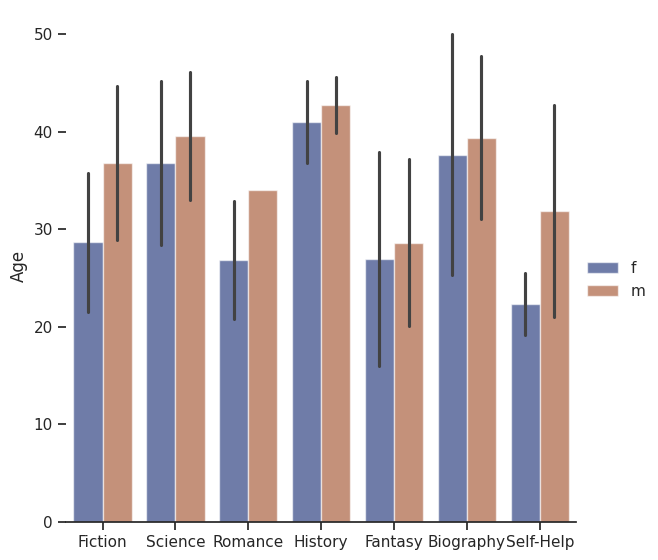

In [29]:
g = sns.catplot(
    data=data, kind="bar",
    x="Favorite_Book_Genre", y="Age", hue="Gender",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Age")
g.legend.set_title("")

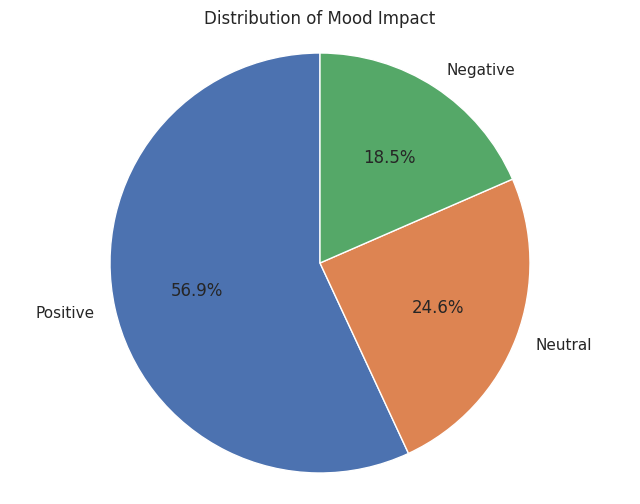

In [32]:
import matplotlib.pyplot as plt

mood_impact_counts = data['Mood_Impact'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(mood_impact_counts, labels=mood_impact_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Mood Impact')
plt.axis('equal')
plt.show()

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     65 non-null     int64 
 1   Age                         65 non-null     int64 
 2   Gender                      65 non-null     object
 3   Favorite_Book_Genre         65 non-null     object
 4   Weekly_Reading_Time(hours)  65 non-null     int64 
 5   Mood_Impact                 65 non-null     object
dtypes: int64(3), object(3)
memory usage: 3.2+ KB


In [40]:
data.describe()

,User_ID,Age,Weekly_Reading_Time(hours)
count,65.00000,65.000000,65.000000
mean,33.00000,33.000000,4.646154
std,18.90767,9.429011,2.718172
min,1.00000,18.000000,1.000000
25%,17.00000,25.000000,2.000000
50%,33.00000,32.000000,5.000000
75%,49.00000,41.000000,7.000000
max,65.00000,50.000000,10.000000


In [41]:
data.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Favorite_Book_Genre,0
Weekly_Reading_Time(hours),0
Mood_Impact,0


In [42]:
data.duplicated().sum()

0

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Favorite_Book_Genre'] = le.fit_transform(data['Favorite_Book_Genre'])
data['Mood_Impact'] = le.fit_transform(data['Mood_Impact'])
data['Gender'] = le.fit_transform(data['Gender'])

In [59]:
encoded_genres = le.fit_transform(data['Favorite_Book_Genre'])
print("Encoded Genres:", np.unique(encoded_genres))

decoded_genres = le.inverse_transform(encoded_genres)
print("Decoded Genres:", np.unique(decoded_genres))


encoded_moodimpact = le.fit_transform(data['Mood_Impact'])
print("Encoded Mood_Impact:", np.unique(encoded_moodimpact))

decoded_moodimpact = le.inverse_transform(encoded_moodimpact)
print("Decoded Mood_Impact:", np.unique(decoded_moodimpact))


encoded_gender = le.fit_transform(data['Gender'])
print("Encoded Gender:", np.unique(encoded_gender))

decoded_gender = le.inverse_transform(encoded_gender)
print("Decoded Gender:", np.unique(decoded_gender))

Encoded Genres: [0 1 2 3 4 5 6]
Decoded Genres: ['Biography' 'Fantasy' 'Fiction' 'History' 'Romance' 'Science' 'Self-Help']
Encoded Mood_Impact: [0 1 2]
Decoded Mood_Impact: ['Negative' 'Neutral' 'Positive']
Encoded Gender: [0 1]
Decoded Gender: ['f' 'm']


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   User_ID                     65 non-null     int64
 1   Age                         65 non-null     int64
 2   Gender                      65 non-null     int64
 3   Favorite_Book_Genre         65 non-null     int64
 4   Weekly_Reading_Time(hours)  65 non-null     int64
 5   Mood_Impact                 65 non-null     int64
dtypes: int64(6)
memory usage: 3.2 KB


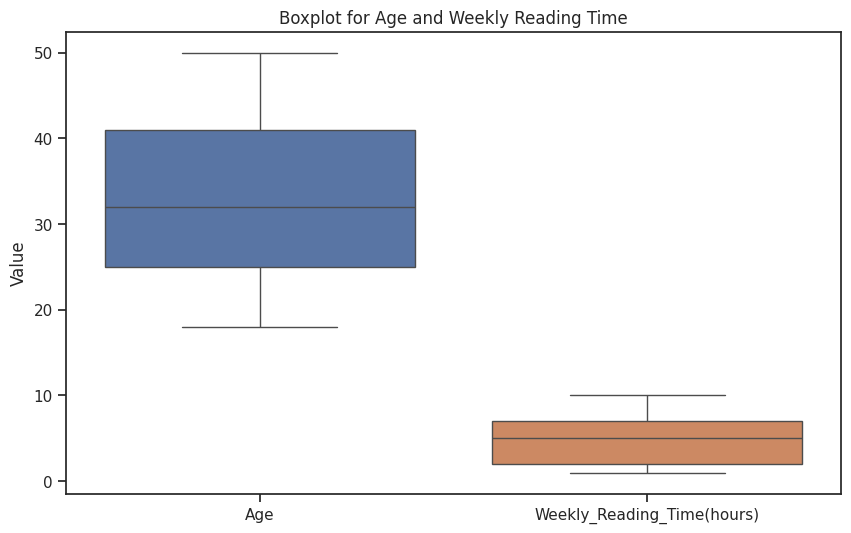

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'Weekly_Reading_Time(hours)']])
plt.title('Boxplot for Age and Weekly Reading Time')
plt.ylabel('Value')
plt.show()

In [65]:
data = data.drop('User_ID', axis=1)
data.head()

,Age,Gender,Favorite_Book_Genre,Weekly_Reading_Time(hours),Mood_Impact
0,24,0,2,6,2
1,32,1,5,2,1
2,18,0,4,8,2
3,45,1,3,3,1
4,29,0,1,10,2


In [99]:
from sklearn.model_selection import train_test_split
X = data.drop('Mood_Impact', axis=1)
y = data['Mood_Impact']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

In [101]:
print(metrics.classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.75      1.00      0.86         3
           2       1.00      0.88      0.93         8

    accuracy                           0.92        13
   macro avg       0.92      0.96      0.93        13
weighted avg       0.94      0.92      0.93        13



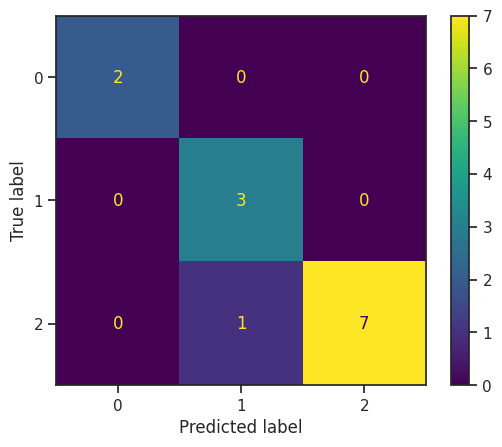

In [102]:
logreg_cm = metrics.confusion_matrix(y_test, logreg_pred)
logreg_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=logreg_cm)
logreg_disp.plot()
plt.show()

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [104]:
print(metrics.classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.50      0.67      0.57         3
           2       1.00      0.75      0.86         8

    accuracy                           0.77        13
   macro avg       0.72      0.81      0.74        13
weighted avg       0.83      0.77      0.78        13



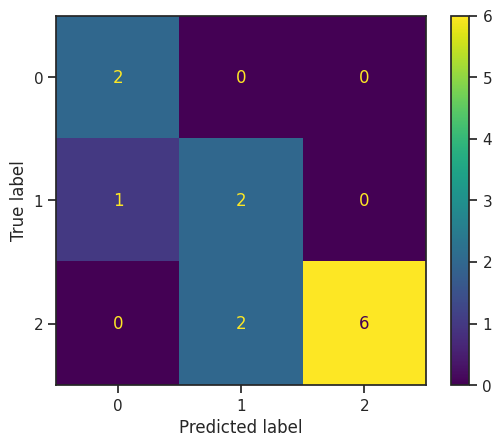

In [105]:
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
knn_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=knn_cm)
knn_disp.plot()
plt.show()

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [107]:
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.75      1.00      0.86         3
           2       1.00      0.88      0.93         8

    accuracy                           0.92        13
   macro avg       0.92      0.96      0.93        13
weighted avg       0.94      0.92      0.93        13



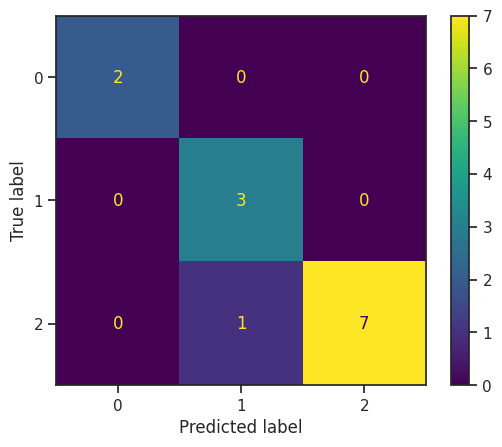

In [108]:
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
rf_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_disp.plot()
plt.show()

In [113]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [114]:
print(metrics.classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         8

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



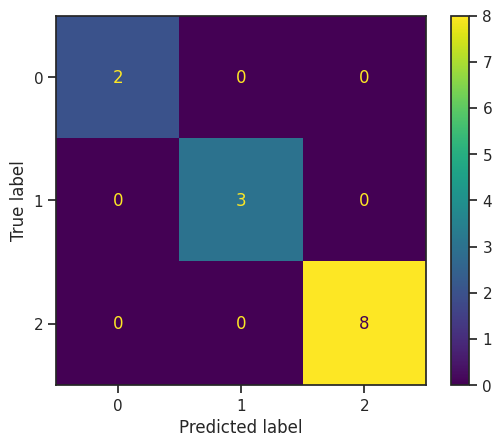

In [115]:
xgb_cm = metrics.confusion_matrix(y_test, xgb_pred)
xgb_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=xgb_cm)
xgb_disp.plot()
plt.show()

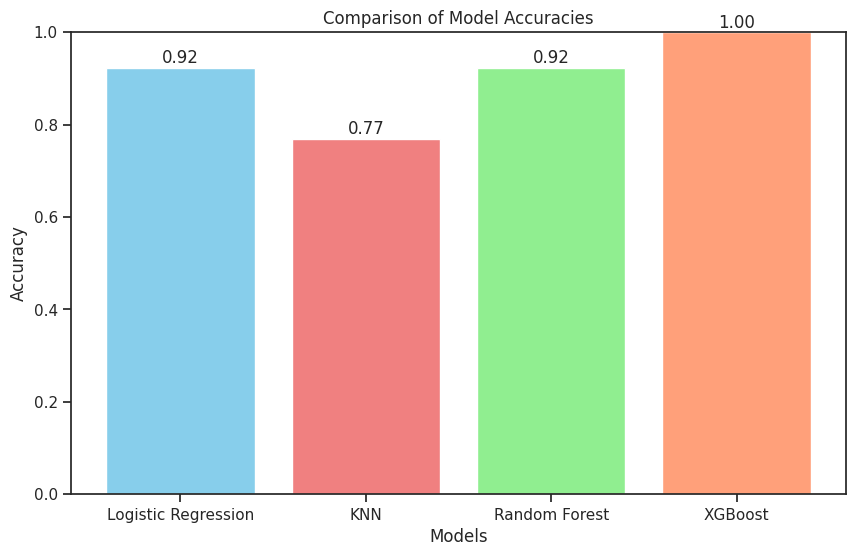

In [121]:
logreg_accuracy = metrics.accuracy_score(y_test, logreg_pred)
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)
xgb_accuracy = metrics.accuracy_score(y_test, xgb_pred)

models = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost']
accuracy_scores = [logreg_accuracy, knn_accuracy, rf_accuracy, xgb_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.show()